In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [34]:
merged_3 = pd.read_excel(r'C:\Users\ASUS\Desktop\new_merged_data 2.xlsx', encoding='utf-8')



In [3]:
x_3 = merged_3.Text
y_3 = merged_3.Sentiment

In [169]:
stop_words = ["bu", "bir", "də","da","ki","və","nə","mən","kim","bunu","hər", 
              "üçün","ya","foto","siz","özünü","VİDEO","Video","kimi","biz","Adam","niyə",
              "adam","video","deo","vi","ilə","ən","qədər","elə","məni","sən","de","ve","mənə"]
x_m3_cv= CountVectorizer(stop_words = stop_words)
x_m3_cv_train = x_m3_cv.fit_transform(x_3.values.astype('U'))
x_m3_cv_test = x_m3_cv.transform(y_3.values.astype('U')).toarray()

In [170]:
x_train_m3, x_test_m3, y_train_m3, y_test_m3 = train_test_split(x_m3_cv_train, y_3, test_size=0.2, random_state=1)


In [171]:
len(x_m3_cv.get_feature_names())

26658

In [172]:
matrix = x_m3_cv.fit_transform(x_3.values.astype('U'))
freqs = zip(x_m3_cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print (sorted(freqs, key=lambda x: -x[1]))

[('çox', 578), ('var', 521), ('gün', 342), ('belə', 328), ('heç', 286), ('amma', 285), ('sonra', 246), ('azərbaycan', 239), ('daha', 230), ('deyil', 230), ('yaxşı', 229), ('olsun', 224), ('olan', 211), ('bütün', 190), ('ama', 189), ('yeni', 186), ('deyir', 182), ('görə', 175), ('öz', 172), ('yox', 167), ('bakıda', 163), ('olur', 163), ('şey', 162), ('allah', 161), ('idi', 157), ('mənim', 153), ('necə', 152), ('qız', 152), ('ne', 151), ('dəfə', 149), ('il', 147), ('səni', 142), ('yoxdu', 138), ('baş', 136), ('2018', 132), ('böyük', 129), ('yenə', 125), ('ilk', 124), ('azərbaycanda', 123), ('ci', 122), ('men', 121), ('onu', 121), ('artıq', 119), ('indi', 118), ('vaxt', 118), ('kafe', 117), ('rt', 116), ('hələ', 114), ('oldu', 114), ('edir', 113), ('olub', 113), ('hə', 112), ('ona', 110), ('ay', 109), ('bilmirəm', 107), ('biri', 107), ('lt', 106), ('olar', 106), ('arasında', 103), ('in', 103), ('olacaq', 102), ('ala', 101), ('edib', 100), ('növbəti', 99), ('gözəl', 95), ('az', 94), ('günü

In [173]:
neg_doc_matrix = x_m3_cv.transform((merged_3[merged_3.Sentiment == "negative"].Text).values.astype('U'))
pos_doc_matrix = x_m3_cv.transform((merged_3[merged_3.Sentiment == 'positive'].Text).values.astype('U'))
neut_doc_matrix = x_m3_cv.transform((merged_3[merged_3.Sentiment == 'neutral'].Text).values.astype('U'))
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neut_tf = np.sum(neut_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
neut = np.squeeze(np.asarray(neut_tf))
term_freq_df = pd.DataFrame([neg,pos,neut],columns=x_m3_cv.get_feature_names()).transpose()

In [174]:
term_freq_df.columns = ['negative', 'positive','neutral']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']+term_freq_df['neutral']
term_freq_df.sort_values(by='total', ascending=False).iloc[:20]

,negative,positive,neutral,total
çox,47,195,336,578
var,35,62,424,521
gün,25,39,278,342
belə,25,29,274,328
heç,39,29,218,286
amma,17,47,221,285
sonra,31,16,199,246
azərbaycan,8,44,187,239
deyil,29,18,183,230
daha,17,29,184,230


In [175]:
neg_tweets = merged_3[merged_3.Sentiment == 'negative']
neg_string = []
for t in neg_tweets.Text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

In [176]:
from PIL import Image
mask = np.array(Image.open("/Users/ASUS/Desktop/AZE.png"))

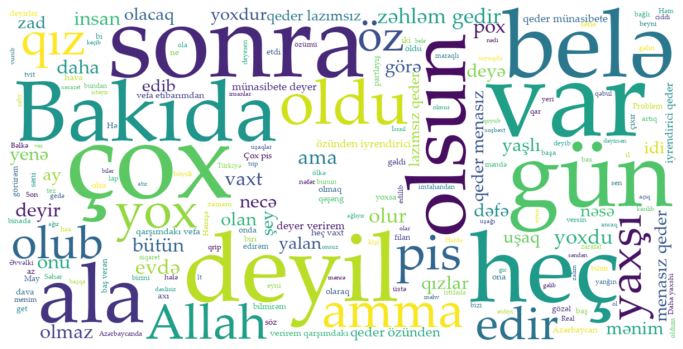

In [177]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
wordcloud_neg = WordCloud(background_color="white",font_path='/Users/ASUS/Desktop/9991.ttf',width=1200, height=600,max_font_size=200, stopwords= stop_words,mask=mask).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.show()


(-0.5, 1199.5, 599.5, -0.5)

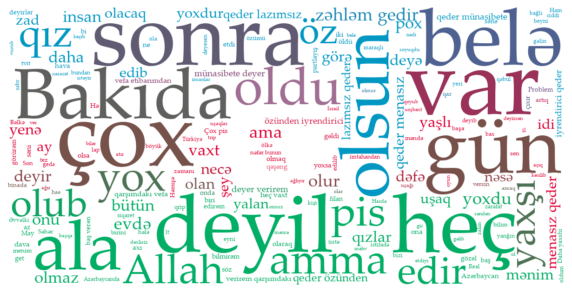

In [178]:
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_neg.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [179]:
pos_tweets = merged_3[merged_3.Sentiment == 'positive']
pos_string = []
for t in pos_tweets.Text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

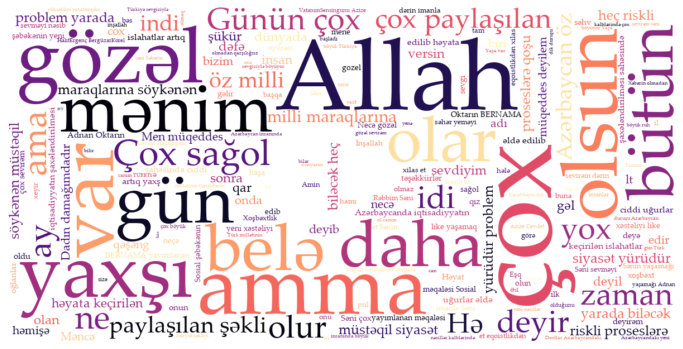

In [180]:
wordcloud_pos = WordCloud(background_color="white",font_path='/Users/ASUS/Desktop/9991.ttf',width=1200, height=600,max_font_size=200,colormap='magma',stopwords= stop_words,mask=mask).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.show()

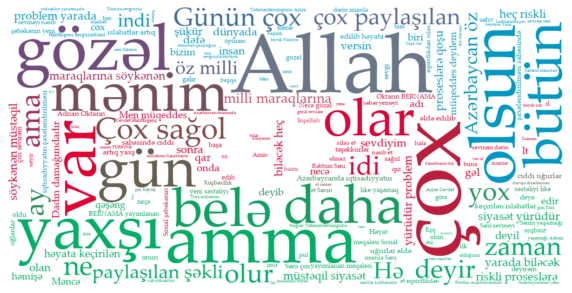

In [181]:
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_pos.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("/Users/ASUS/Desktop/flag.png", format="png")